In [144]:
library(ggplot2)

In [201]:
arch <- "500-250-50"
# arch <- "200-100-10"
# arch <- "50-25-5"
# arch <- "3-2-1"

In [205]:
fn <- paste0("../results/", arch, "_scores.txt")
print(fn)
scores <- read.table(fn, sep = ",", header=T, stringsAsFactors = F)


[1] "../results/500-250-50_scores.txt"


In [206]:
scores$file <-  basename(scores$cluster)

In [207]:
scores$cluster <- factor(rep(c("EG", "abp", "SG", "y", "AST", "ab"), each=3), levels = c("ab", "abp", "y", "EG", "SG", "AST"))

ERROR: Error in `$<-.data.frame`(`*tmp*`, cluster, value = structure(c(4L, 4L, : replacement has 18 rows, data has 8


In [199]:
w <- 10
h <- 5
options(repr.plot.width=w)
options(repr.plot.height=h)
theme_set(theme_bw(base_size=20) + theme(axis.text.x = element_text(size=10), title = element_text(size=10)))


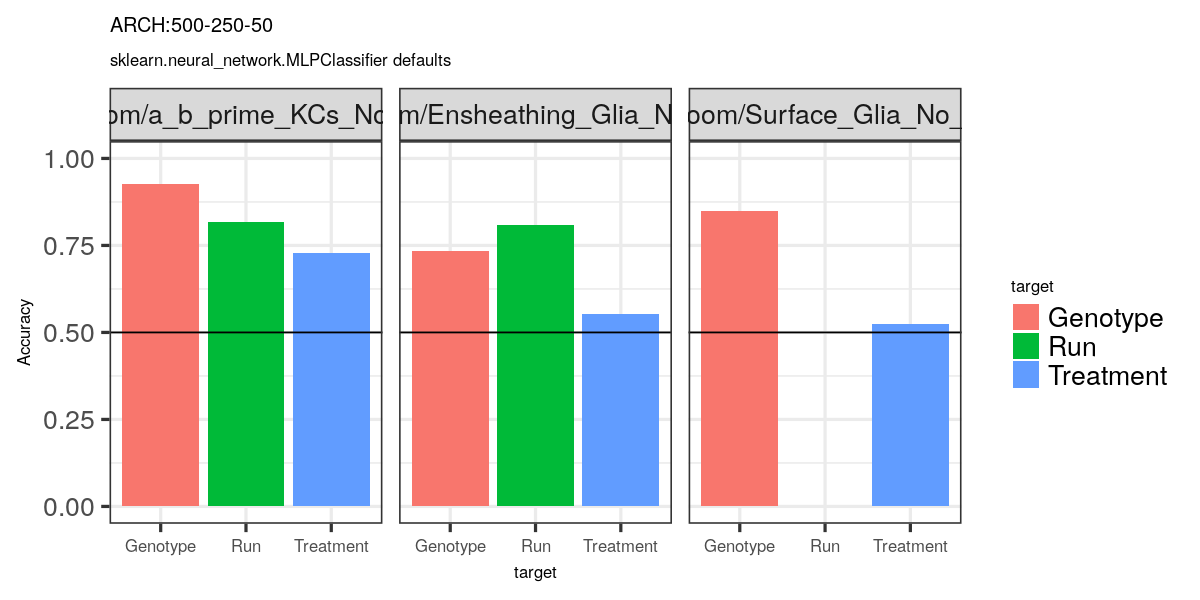

In [200]:
gg <- ggplot(data =scores, aes(x=target, y = score, fill = target)) + geom_bar(stat="identity") + facet_wrap("cluster") + geom_hline(yintercept = 0.5) +
  ggtitle(label = paste0("ARCH:", arch), subtitle = "sklearn.neural_network.MLPClassifier defaults") + labs(y="Accuracy") + scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.25))
gg

In [194]:
ggsave(plot = gg, filename = paste0("../results/plots/", substr(Sys.time(), 1, 10), "_", arch, "_scores.png"), height = h, width = w)